In [1]:
# PROJECT NAME - Comment Toxicity Detection System.

In [2]:
# STEP 1 - Install Required Libraries

!pip install pandas numpy matplotlib seaborn nltk scikit-learn --quiet

In [3]:
# STEP 2 - Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# STEP 3 - Load Dataset

from google.colab import files
print("Upload Train.csv")
uploaded_train = files.upload()
print("Upload Test.csv")
uploaded_test = files.upload()

# Load into DataFrames
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
print("✅ Train and Test datasets loaded successfully!")

Upload Train.csv


Saving Train.csv to Train.csv
Upload Test.csv


Saving Test.csv to Test.csv
✅ Train and Test datasets loaded successfully!



--- TRAIN DATASET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None

--- TRAIN HEAD ---
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\

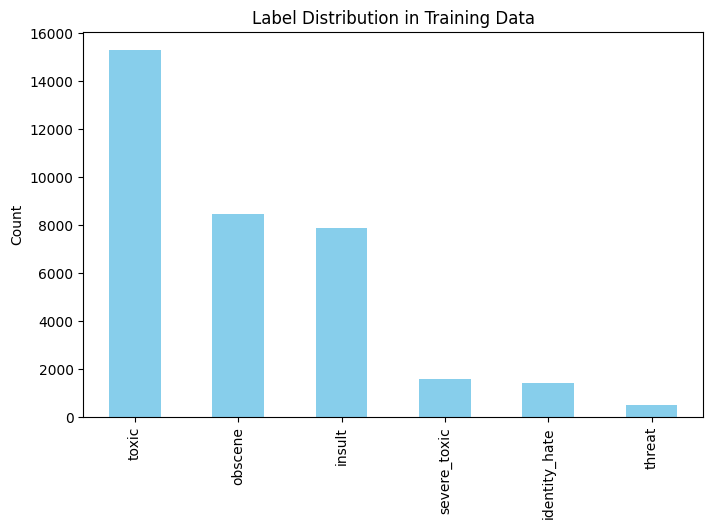

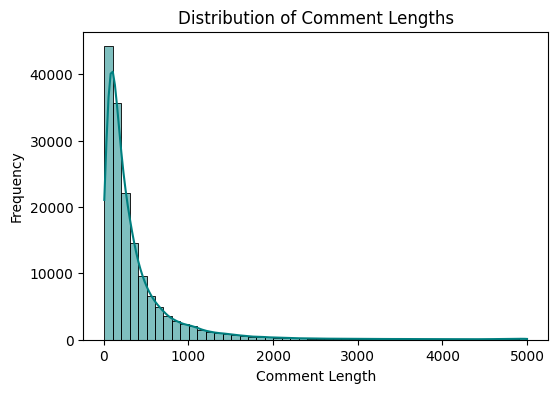

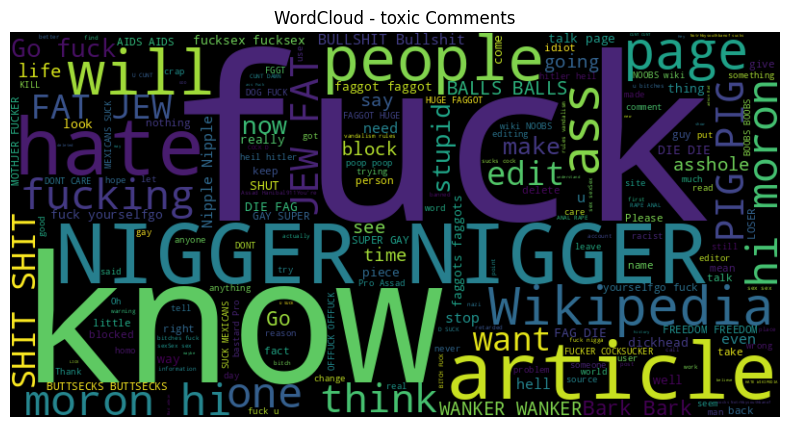

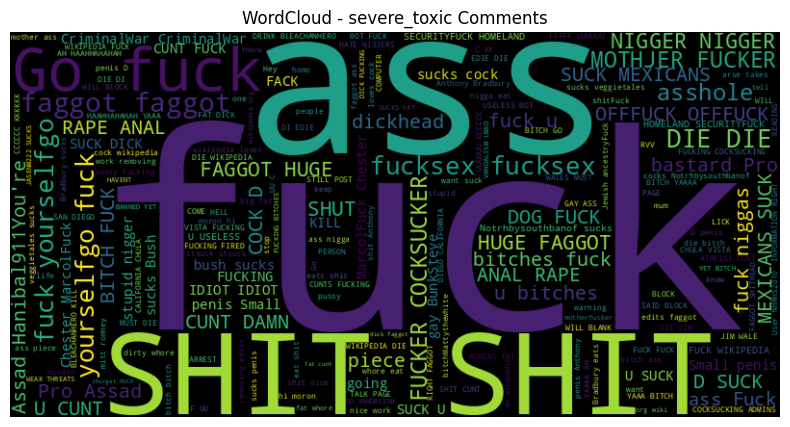

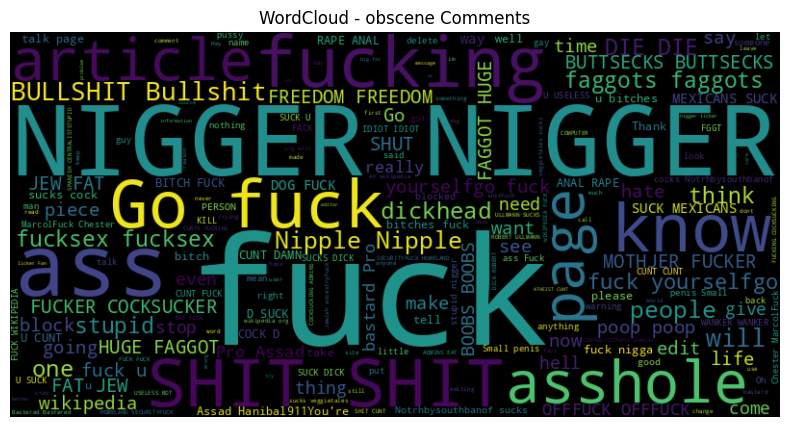

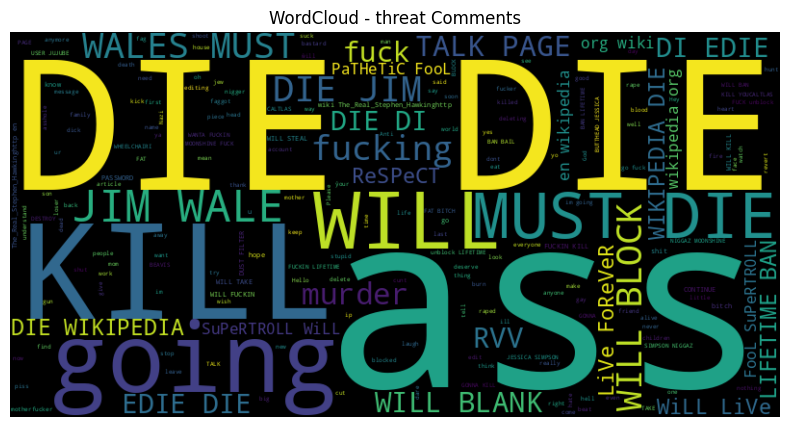

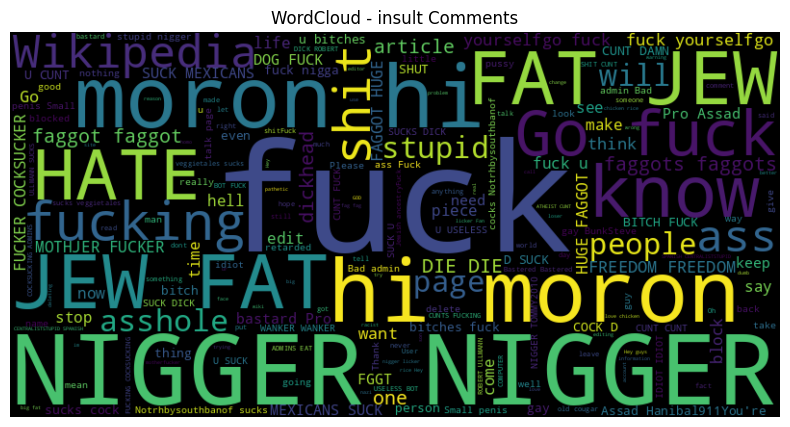

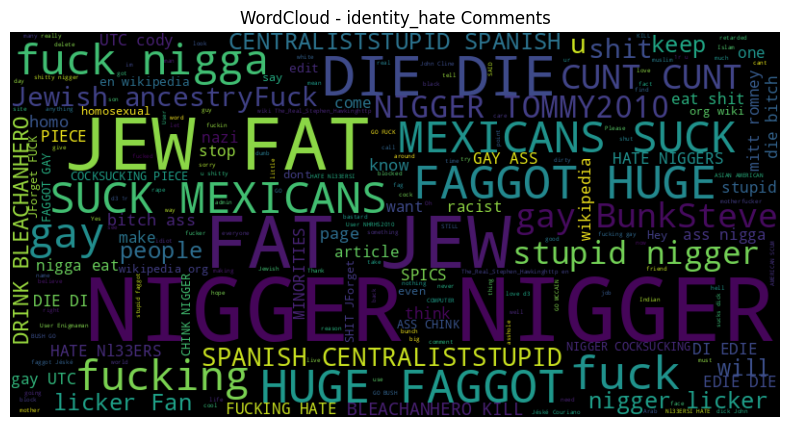

In [5]:
# STEP 4 - Explore Dataset

print("\n--- TRAIN DATASET INFO ---")
print(train_df.info())
print("\n--- TRAIN HEAD ---")
print(train_df.head())
print("\n--- TEST DATASET INFO ---")
print(test_df.info())
print("\n--- TEST HEAD ---")
print(test_df.head())
print("\n TRAIN SHAPE:", train_df.shape, " TEST SHAPE:", test_df.shape)

# Label Distribution (Multi-label)
label_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
plt.figure(figsize=(8,5))
train_df[label_cols].sum().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Label Distribution in Training Data")
plt.ylabel("Count")
plt.show()

# Comment Length Distribution
train_df['comment_length'] = train_df['comment_text'].apply(len)
plt.figure(figsize=(6,4))
sns.histplot(train_df['comment_length'], bins=50, kde=True, color="teal")
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length")
plt.ylabel("Frequency")
plt.show()

# WordClouds for each label
from wordcloud import WordCloud
for label in label_cols:
    comments = " ".join(train_df[train_df[label]==1]['comment_text'])
    if comments.strip():
        wc = WordCloud(width=800, height=400, background_color="black", colormap="viridis").generate(comments)
        plt.figure(figsize=(10,5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud - {label} Comments")
        plt.show()

In [6]:
# STEP 5 - Text Preprocessing

import re
import nltk
import pickle
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Setup & Downloads
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = frozenset(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)       # remove URLs
    text = re.sub(r"<.*?>", "", text)                # remove HTML
    text = text.encode("ascii", "ignore").decode()   # remove non-ascii
    text = re.sub(r"[^a-z\s]", " ", text)            # keep only alphabets
    tokens = re.findall(r"[a-z]+", text)             # tokenize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

# Batch Processing
def process_in_batches(df, text_col, batch_size=5000):
    results = []
    for start in range(0, len(df), batch_size):
        batch = df[text_col].iloc[start:start+batch_size].apply(clean_text)
        results.extend(batch)
        print(f"Processed {start+len(batch)} / {len(df)} rows")
    return results

# Apply Cleaning
train_df["clean_comment"] = process_in_batches(train_df, "comment_text", batch_size=5000)
test_df["clean_comment"]  = process_in_batches(test_df, "comment_text", batch_size=5000)

# TF-IDF Vectorization
max_features = 5000
tfidf = TfidfVectorizer(max_features=max_features)
X_train = tfidf.fit_transform(train_df["clean_comment"]).toarray()
X_test  = tfidf.transform(test_df["clean_comment"]).toarray()
print("\n✅ TF-IDF Vectorization Complete!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Labels (multi-label classification)
y_train = train_df[label_cols].values
print("y_train shape:", y_train.shape)

# Save Tokenizer/Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)
print("✅ TF-IDF Vectorizer saved as tfidf_vectorizer.pkl")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed 5000 / 159571 rows
Processed 10000 / 159571 rows
Processed 15000 / 159571 rows
Processed 20000 / 159571 rows
Processed 25000 / 159571 rows
Processed 30000 / 159571 rows
Processed 35000 / 159571 rows
Processed 40000 / 159571 rows
Processed 45000 / 159571 rows
Processed 50000 / 159571 rows
Processed 55000 / 159571 rows
Processed 60000 / 159571 rows
Processed 65000 / 159571 rows
Processed 70000 / 159571 rows
Processed 75000 / 159571 rows
Processed 80000 / 159571 rows
Processed 85000 / 159571 rows
Processed 90000 / 159571 rows
Processed 95000 / 159571 rows
Processed 100000 / 159571 rows
Processed 105000 / 159571 rows
Processed 110000 / 159571 rows
Processed 115000 / 159571 rows
Processed 120000 / 159571 rows
Processed 125000 / 159571 rows
Processed 130000 / 159571 rows
Processed 135000 / 159571 rows
Processed 140000 / 159571 rows
Processed 145000 / 159571 rows
Processed 150000 / 159571 rows
Processed 155000 / 159571 rows
Processed 159571 / 159571 rows
Processed 5000 / 153164 rows

In [7]:
# STEP 6 - Model Development (LSTM)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

# Tokenization & Padding
max_words = 50000
max_len   = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df["clean_comment"])
X_seq = tokenizer.texts_to_sequences(train_df["clean_comment"])
X_pad = pad_sequences(X_seq, maxlen=max_len)
y = train_df[label_cols].values

# Train-Val Split
X_train, X_val, y_train, y_val = train_test_split(
    X_pad, y, test_size=0.2, random_state=42
)

# Build LSTM Model
lstm_model = Sequential([
    Embedding(max_words, 128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(len(label_cols), activation="sigmoid")
])
lstm_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
lstm_model.summary()

# Train Model
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=256,
    verbose=1
)

# Evaluate
val_loss, val_acc = lstm_model.evaluate(X_val, y_val, verbose=0)
print(f"✅ LSTM Validation Accuracy: {val_acc:.4f}")
print(f"✅ LSTM Validation Loss: {val_loss:.4f}")

# Save History
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)
print("✅ Training history saved as history.pkl")

# Save Model
lstm_model.save("Toxic_LSTM_Model.keras")
print("✅ Model saved as Toxic_LSTM_Model.keras")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.5247 - loss: 0.1631 - val_accuracy: 0.9941 - val_loss: 0.0539
Epoch 2/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 703s 1s/step - accuracy: 0.9186 - loss: 0.0477 - val_accuracy: 0.9941 - val_loss: 0.0563
Epoch 3/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.9513 - loss: 0.0414 - val_accuracy: 0.9941 - val_loss: 0.0532
Epoch 4/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 684s 1s/step - accuracy: 0.9402 - loss: 0.0373 - val_accuracy: 0.9940 - val_loss: 0.0534
Epoch 5/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 721s 1s/step - accuracy: 0.9236 - loss: 0.0336 - val_accuracy: 0.9921 - val_loss: 0.0530
Epoch 6/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 712s 1s/step - accuracy: 0.8681 - loss: 0.0301 - val_accuracy: 0.9695 - val_loss: 0.0562
Epoch 7/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.7827 - loss: 0.0271 - val_accuracy: 0.7474 - val_loss: 0.0576
Epoch 8/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 736s 1s/step - accuracy: 0.6937 - loss: 0.0242 - val_accu

In [19]:
# STEP 7 - Streamlit Creation

app_code = """
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# ===============================
# CONFIG
# ===============================
MODEL_PATH = "Toxic_LSTM_Model.keras"
VECTORIZER_PATH = "tfidf_vectorizer.pkl"
HISTORY_PATH = "history.pkl"
label_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

# ===============================
# LOAD MODEL & VECTORIZER
# ===============================
@st.cache_resource
def load_model():
    if os.path.exists(MODEL_PATH):
        return tf.keras.models.load_model(MODEL_PATH)
    else:
        st.error(f"❌ Model file not found: {MODEL_PATH}")
        return None
@st.cache_resource
def load_vectorizer():
    if os.path.exists(VECTORIZER_PATH):
        with open(VECTORIZER_PATH, "rb") as f:
            return pickle.load(f)
    else:
        st.error(f"❌ Vectorizer file not found: {VECTORIZER_PATH}")
        return None
model = load_model()
vectorizer = load_vectorizer()

# ===============================
# STREAMLIT UI
# ===============================
st.set_page_config(page_title="🌈 Toxic Comment Detector", page_icon="🤖", layout="wide")
st.markdown(
    '''
    <style>
    .main { background-color: #fffdf7; }
    .stTextInput>div>div>input { background-color: #f0f8ff; color: #000; font-weight: bold; }
    .stButton>button { background-color: #ff69b4; color: white; font-size: 16px; border-radius: 8px; }
    .stDataFrame { background-color: #f8fbff; }
    </style>
    ''',
    unsafe_allow_html=True
)
st.title("🌈 Toxic Comment Classification App")
st.subheader("🔥 Detect toxic comments in real-time and analyze model performance!")

# ===============================
# SIDEBAR MENU
# ===============================
st.sidebar.header("⚙️ Options")
option = st.sidebar.radio("Choose Action:", ["Real-time Prediction", "Bulk Prediction", "Insights & Metrics"])

# ===============================
# REAL-TIME PREDICTION
# ===============================
if option == "Real-time Prediction":
    st.markdown("### ✍️ Enter a comment below and check its toxicity:")
    user_input = st.text_area("Enter Comment:", "")
    if st.button("Predict 🚀") and model and vectorizer:
        if user_input.strip() != "":
            X_input = vectorizer.transform([user_input])
            pred = model.predict(X_input)[0]
            results = dict(zip(label_cols, pred))
            st.success("✅ Prediction Complete!")
            df_res = pd.DataFrame(results.items(), columns=["Category", "Probability"])
            df_res["Probability"] = df_res["Probability"].round(3)
            st.dataframe(df_res)
            # Visualization
            fig, ax = plt.subplots(figsize=(8,4))
            sns.barplot(x="Category", y="Probability", data=df_res, palette="coolwarm", ax=ax)
            ax.set_ylim(0,1)
            plt.xticks(rotation=45)
            st.pyplot(fig)
        else:
            st.warning("⚠️ Please enter a comment!")

# ===============================
# BULK PREDICTION
# ===============================
elif option == "Bulk Prediction":
    st.markdown("### 📂 Upload a CSV file")
    uploaded_file = st.file_uploader("Upload CSV", type=["csv"])
    if uploaded_file is not None and model and vectorizer:
        df = pd.read_csv(uploaded_file)
        if "comment_text" in df.columns:
            # 🔍 Data Insights
            st.markdown("#### 📊 Data Insights")
            st.write(df.describe(include="all"))
            st.write("Dataset Shape:", df.shape)
            st.write("First few comments:")
            st.write(df["comment_text"].head())
            # Transform with vectorizer
            X_input = vectorizer.transform(df["comment_text"].astype(str).tolist())
            preds = model.predict(X_input)
            preds_df = pd.DataFrame(preds, columns=label_cols)
            result = pd.concat([df, preds_df], axis=1)
            st.success("✅ Bulk Predictions Done!")
            st.dataframe(result.head(10))
            # Download Option
            csv = result.to_csv(index=False).encode("utf-8")
            st.download_button("📥 Download Results CSV", csv, "predictions.csv", "text/csv")
        else:
            st.error("❌ CSV must have a 'comment_text' column!")

# ===============================
# INSIGHTS & METRICS
# ===============================
elif option == "Insights & Metrics":
    st.markdown("### 📊 Model Insights & Performance Metrics")
    # Load training history if available
    if os.path.exists(HISTORY_PATH):
        with open(HISTORY_PATH, "rb") as f:
            history = pickle.load(f)
        st.write("#### 📈 Training History")
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        ax[0].plot(history.get("accuracy", []), label="Train Acc")
        ax[0].plot(history.get("val_accuracy", []), label="Val Acc")
        ax[0].set_title("Accuracy")
        ax[0].legend()
        ax[1].plot(history.get("loss", []), label="Train Loss")
        ax[1].plot(history.get("val_loss", []), label="Val Loss")
        ax[1].set_title("Loss")
        ax[1].legend()
        st.pyplot(fig)
    else:
        st.info("ℹ️ Training history not found. Save 'history.pkl' for detailed metrics.")
    # Sample test cases
    if model and vectorizer:
        st.markdown("#### 🔍 Sample Test Cases")
        sample_texts = [
            "I love this community ❤️",
            "You are an idiot 🤬",
            "Let's meet for coffee tomorrow ☕",
            "This is the worst thing ever 😡"
        ]
        X_input = vectorizer.transform(sample_texts)
        preds = model.predict(X_input)
        sample_df = pd.DataFrame(preds, columns=label_cols)
        sample_df.insert(0, "Comment", sample_texts)
        st.dataframe(sample_df.round(3))
"""

# Save to app.py
with open("app.py", "w") as f:
    f.write(app_code)
print("✅ Streamlit app code saved as app.py")

✅ Streamlit app code saved as app.py


In [20]:
# STEP 8 - Streamlit Deployment

# Install necessary packages
!pip install -q streamlit pyngrok

# Import required libraries
import os
import time
from pyngrok import ngrok, conf

# Configure Ngrok Authentication
NGROK_AUTH_TOKEN = "2z0Oqv0tD166fELGCHwV2gLZwq1_2G2zUQRSs6C27k9vdzxwq"
conf.get_default().auth_token = NGROK_AUTH_TOKEN

# Create logs directory
LOG_DIR = "/content/logs"
os.makedirs(LOG_DIR, exist_ok=True)

# Run Streamlit app in background
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0 > {LOG_DIR}/app_log.txt 2>&1 &

# Give Streamlit a few seconds to start
time.sleep(7)

# Connect Ngrok to the running Streamlit app
public_url = ngrok.connect(8501, "http")
print("🚀 Your Streamlit app is live at:", public_url.public_url)

🚀 Your Streamlit app is live at: https://51e84a2cb26b.ngrok-free.app
